# 6. 數據分析專案
# Demo3 – TA library

In [1]:
# TA-Lib
# export TA_INCLUDE_PATH="$(brew --prefix ta-lib)/include"
# export TA_LIBRARY_PATH='$(brew --prefix ta-lib)/lib'
# # TA-Lib
# export TA_INCLUDE_PATH="$/Ubuntu/home/user/include"
# export TA_LIBRARY_PATH='$/Ubuntu/home/user/lib'

### Ta-lib

In [1]:
import pandas as pd
import numpy as np
import talib
import math
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ModuleNotFoundError: No module named 'talib'

In [ ]:
df_nvda = yf.download('NVDA', start='2022-04-01',
                      end='2023-01-01')
df_nvda

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-01,273.750000,274.959991,262.670013,267.119995,266.842926,51723500
2022-04-04,267.279999,275.579987,266.130005,273.600006,273.316223,39712000
2022-04-05,272.540009,273.190002,258.200012,259.309998,259.041077,43661500
2022-04-06,249.339996,253.000000,240.029999,244.070007,243.816879,70383300
2022-04-07,244.410004,247.220001,234.779999,242.080002,241.828934,55799200
...,...,...,...,...,...,...
2022-12-23,151.960007,153.389999,148.830002,152.059998,152.018448,34932600
2022-12-27,150.740005,151.000000,140.559998,141.210007,141.171417,46490200
2022-12-28,139.270004,142.619995,138.839996,140.360001,140.321640,35106600


### STOCHASTIC RSI

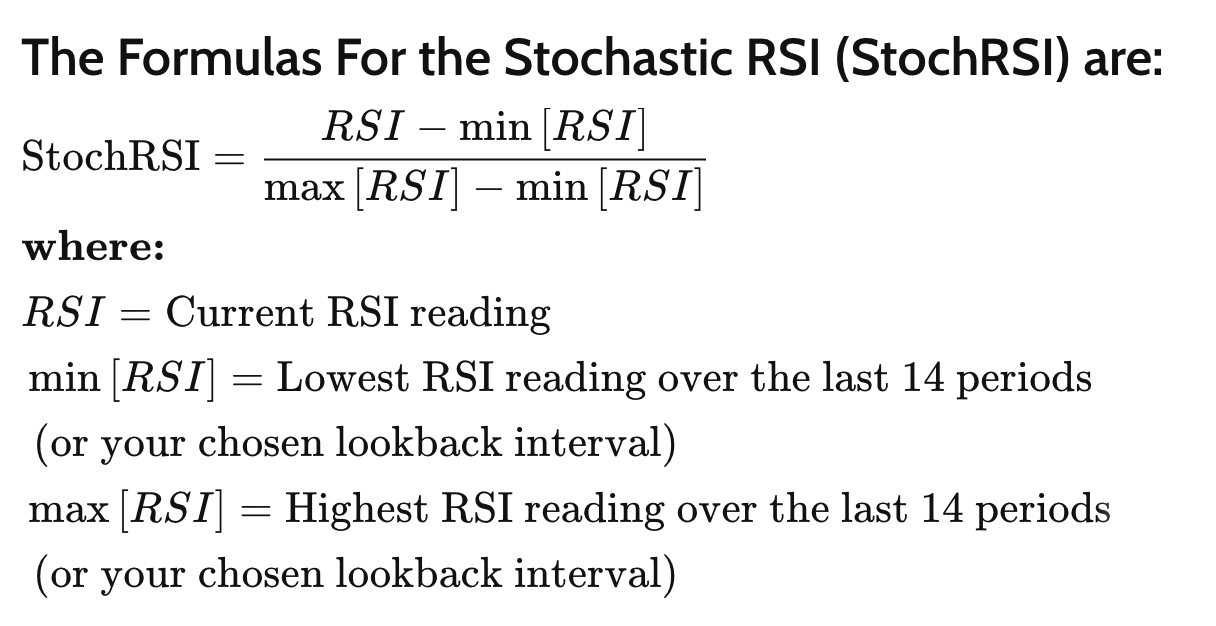

### STOCHASTIC & RSI

In [ ]:
rsi = talib.RSI(df_nvda['Close'], timeperiod=14)
k, d = talib.STOCH(df_nvda['High'], df_nvda['Low'], df_nvda['Close'],14)

In [ ]:
fig = make_subplots (rows=3, cols=1, shared_xaxes=True,
                     vertical_spacing=0.01, row_heights=[0.7, 0.15, 0.15])
fig.add_trace(go.Candlestick(x=df_nvda.index,
                             open=df_nvda['Open'],high=df_nvda['High'],
                             low=df_nvda['Low'], close=df_nvda['Close'],
                             showlegend=True, name='Close Price'),row=1,col=1 )
fig.add_trace(go.Scatter(x=df_nvda.index,
                         y=k, name='Stoch - k',
                         line=dict(color='red', width=1)
                         ), row=2, col=1)
fig.add_trace(go.Scatter(x=df_nvda.index,
                         y=d, name='Stoch - d',
                         line=dict(color='blue', width=1)
                         ), row=2, col=1)
fig.add_trace(go.Scatter(x=df_nvda.index, y=rsi, name='RSI',
                         marker=dict(color ='purple')), row=3, col=1)
fig.update_layout(title="NVDIA Share Price (Close) US$",
                  xaxis_rangeslider_visible=False)
fig.show()

### Bollinger Bands

Bollinger Bands are envelopes plotted at a standard deviation level above and
below a simple moving average of the price. Because the distance of the bands
is based on standard deviation, they adjust to volatility swings in the
underlying price. Bollinger Bands use 2 parameters, Period and Standard
Deviations.
Typical values used:
Short term: 10 day moving average, bands at 1.5 standard deviations. (1.5 times the
standard dev. +/- the SMA)
Medium term: 20 day moving average, bands at 2 standard deviations.
Long term: 50 day moving average, bands at 2.5 standard deviations.

In [ ]:
from talib import MA_Type

upper, middle, lower = talib.BBANDS(df_nvda['Close'], matype=MA_Type.T3)
# Note (for your ref):65t6
# MA_Type.T3 = talib.MA(closed,timeperiod=10, matype=3)

In [ ]:
fig=go.Figure(data=[go.Candlestick(x=df_nvda.index,
                                   open=df_nvda['Open'], high=df_nvda['High'],
                                   low=df_nvda['Low'], close=df_nvda['Close'],
                                   showlegend=True, name='Close Price')] )
# Moving Average
fig.add_trace(go.Scatter(x=df_nvda.index, y = middle,
                         line_color = 'black', name = 'sma'))

# Upper Bound
fig.add_trace(go.Scatter(x = df_nvda.index, y = upper,
                         line_color = 'gray', line = {'dash': 'dash'},
                         name = 'upper band', opacity = 0.5))

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x = df_nvda.index, y = lower,
                          line_color = 'orange', line = {'dash': 'dash'},
                          fill = 'tonexty', name = 'lower band', opacity = 0.4))

fig.update_layout(title="NVDIA Share Price (Close) US$",
                 xaxis_rangeslider_visible=False)

### MACD

Moving average convergence divergence (MACD) is one of the most
popular technical indicators in trading. The MACD is appreciated by traders
worldwide for its simplicity and flexibility, as it can be used as a trend or
momentum indicator and signal opportunities to enter and exit positions.

In [ ]:
close=df_nvda['Close']
# TA Lib setting
macd,macdsignal, macdhist = talib.MACD(close,fastperiod=12,slowperiod=26, signalperiod=9)
# Colorize the histogram values
colors = np.where(macdhist < 0, '#008000', '#FF00FF')

fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.01, row_heights=[0.8, 0.2])

fig.add_trace(go.Candlestick(x=df_nvda.index,
                             open=df_nvda['Open'],high=df_nvda['High'],
                             low=df_nvda['Low'], close=df_nvda['Close'],
                             showlegend=True, name='Close Price'),row=1,col=1 )

# MACD
fig.append_trace(
    go.Scatter(x=df_nvda.index, y=macd,
               line=dict(color='#ff9900', width=2), name='macd',
               legendgroup='2',), row=2, col=1)

# MACD Signal
fig.append_trace(
    go.Scatter(x=df_nvda.index, y=macdsignal,
               line=dict(color='#000000', width=2),
               legendgroup='2',name='signal'), row=2, col=1)

# histogram
fig.append_trace(
    go.Bar(x=df_nvda.index, y=macdhist, name='histogram',
           marker_color=colors,), row=2, col=1)

fig.update_layout(title="NVDIA Share Price (Close) US$",
                  xaxis_rangeslider_visible=False)
fig.show()

### ADOSC

Accumulation/Distribution Oscillator (ADOSC) is a volume indicator. The ADOSC is a
cumulative indicator that uses volume and price to assess whether a stock is being
accumulated or distributed.
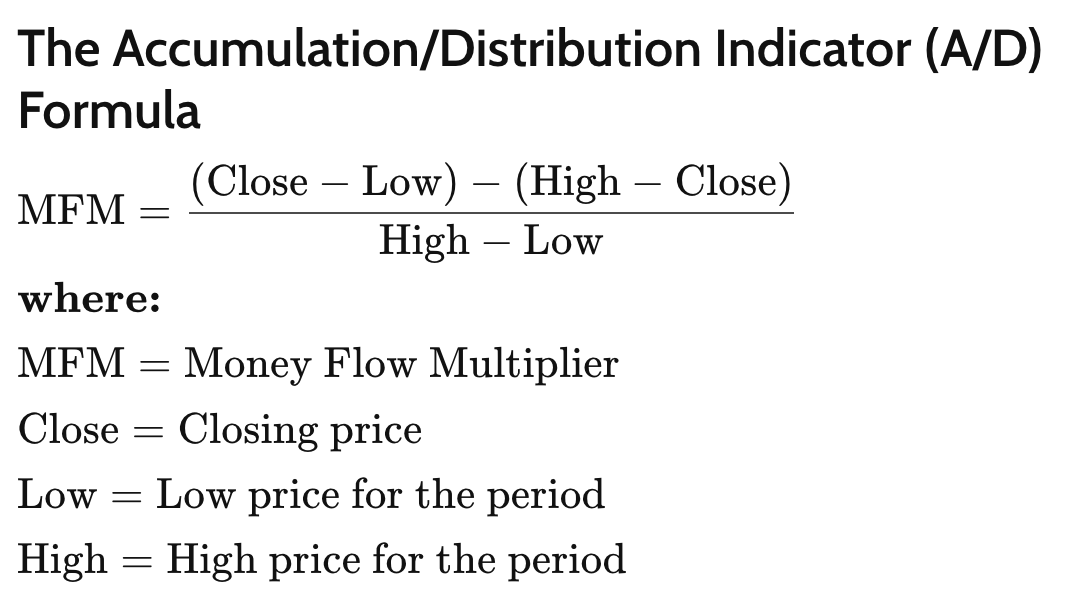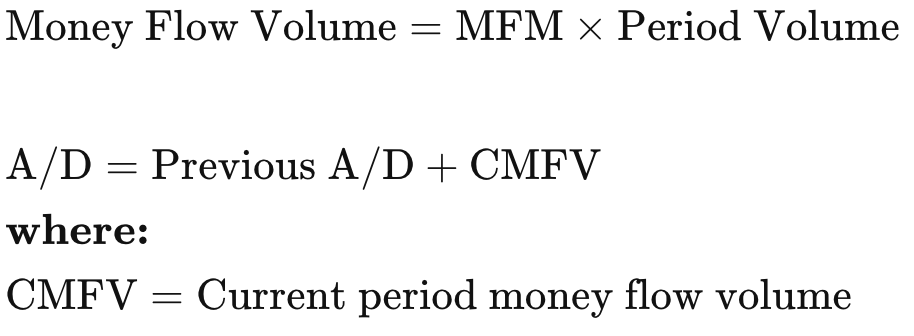

In [ ]:
open=df_nvda['Open']
high=df_nvda['High']
low=df_nvda['Low']
close=df_nvda['Close']
volume=df_nvda['Volume']
# TA Lib setting
real = talib.ADOSC(high, low,close,volume,fastperiod=3, slowperiod=10)

adosc = talib.ADOSC(df_nvda['High'],df_nvda['Low'],df_nvda['Close'],
                    df_nvda['Volume'],fastperiod=3, slowperiod=10)

In [ ]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.01, row_heights=[0.7, 0.3])

fig.add_trace(go.Candlestick(x=df_nvda.index,
                             open=df_nvda['Open'],high=df_nvda['High'],
                             low=df_nvda['Low'], close=df_nvda['Close'],
                             showlegend=True, name='Close Price'),row=1,col=1 )
fig.add_trace(go.Scatter(x=df_nvda.index, y=adosc, name='ADOSC',
                         marker=dict(color='purple')),row=2, col=1)
fig.update_layout(title="NVDIA Share Price (Close) US$",
                  xaxis_rangeslider_visible=False)
fig.show()

### ATR & TR

The average true range (ATR) is a technical analysis indicator introduced by
market technician J. Welles Wilder Jr. in his book New Concepts in Technical
Trading Systems that measures market volatility by decomposing the entire
range of an asset price for that period.
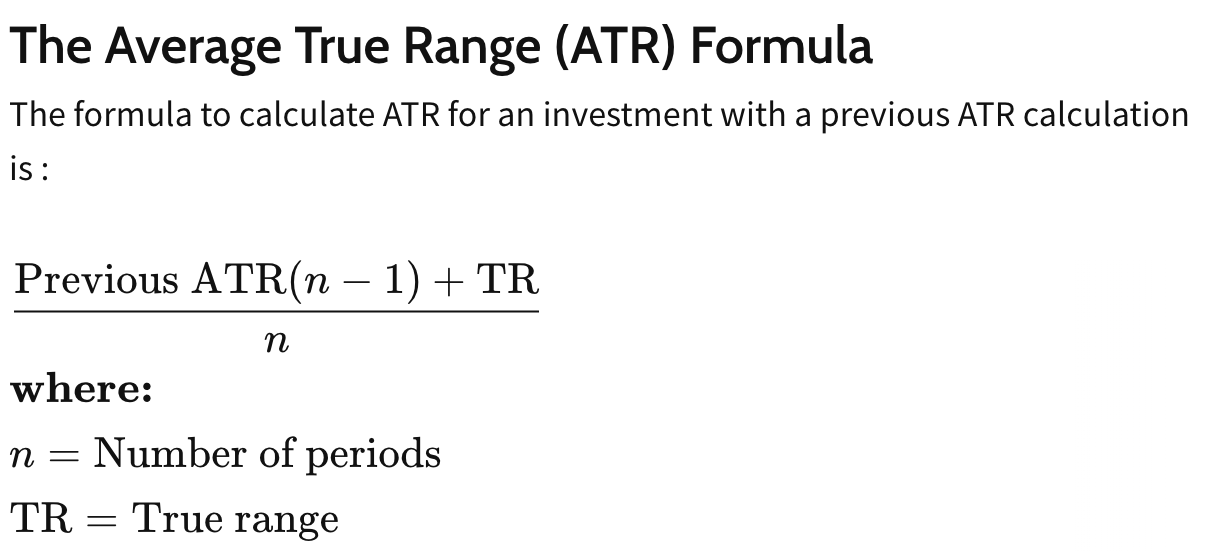

In [ ]:
# TA lib setting
ATR = talib.ATR(high, low, close, timeperiod=14)
TR = talib.TRANGE(high, low, close)

atr = talib.ATR(df_nvda['High'],df_nvda['Low'],df_nvda['Close'], timeperiod=14)
tr = talib.TRANGE(df_nvda['High'],df_nvda['Low'],df_nvda['Close'])

In [ ]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.01, row_heights=[0.7, 0.3])
fig.add_trace(go.Candlestick(x=df_nvda.index,
                             open=df_nvda['Open'],high=df_nvda['High'],
                             low=df_nvda['Low'], close=df_nvda['Close'],
                             showlegend=True, name='Close Price'),row=1,col=1 )
fig.add_trace(go.Scatter(x=df_nvda.index, y=atr, name='ATR',
                         marker=dict(color='orange')),row=2, col=1)
fig.add_trace(go.Scatter(x=df_nvda.index, y=tr, name='TR',
                         marker=dict(color='purple')),row=2, col=1)
fig.update_layout(title="NVDIA Share Price (Close) US$",
                  xaxis_rangeslider_visible=False)
fig.show()